# Lab 0: Preparation: Introduction to Numpy, Matplotlib and Pandas
In the next sessions we will implement our own machine learning algorithms in Python. Each lab will have a **Jupyter Notebook** with some theoretical background and an assignment. We will rely on different python libraries to make our work easier. Use this preparation to make sure everything is installed correctly and to become familiar with the tools since we will not have time to do this in the lab sessions. 
- **Python**: Python is arguably the most common language for datascience/ machine learning development. See https://www.stavros.io/tutorials/python/ if you are not familiar with python.
- **Jupyter Notebooks**: provide an interactive way to develop python code. See https://realpython.com/jupyter-notebook-introduction/ if you are not familiar with Notebooks.
- **Numpy**: NumPy is a Python library that supports large, multi-dimensional arrays and matrices. It provides a large collection of high-level mathematical functions to operate on these arrays. See http://cs231n.github.io/python-numpy-tutorial/ if you are not familiar with Numpy.
- **Pandas**: provides functionality for exploratory data analysis. It is especially useful if the data is stored in tabular format. See https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/ or https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html if you are not familiar with Pandas.
- **Matplotlib** and **Seaborn**: We will use these to plot data and graphs. You can find a lot of examples here: https://seaborn.pydata.org/examples/index.html

You can also find a good introduction to each of these tools here: https://jakevdp.github.io/PythonDataScienceHandbook/

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Pandas
The file "data.csv" contains historical data about the average wage for different job categories. This is publicly available at https://data.gov.be/en/node/27158.
Explore this data and answer the following questions:
- Which jobs earn the most/ the least ?
- Visualize the distribution of the wages for each year.
- Which jobs have seen the highest increase in wage ?
- What was the average increase in wage for each year ?

In [7]:
data = pd.read_csv("data.csv")

In [126]:
print("Job with highest wages in 2017:")
data.sort_values(by=['2017'], ascending=False).head()

Job with highest wages in 2017:


,Beroep,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Directeurs van grote ondernemingen,8214,8329,8610,8948,9018,9253,9285,9578,10124
4,Managers op het gebied van informatie en commu...,6529,6573,6725,6821,6863,6925,6940,7160,7566
1,Managers op het gebied van zakelijke dienstver...,6313,6357,6527,6623,6658,6734,6756,6953,7352
2,"Managers op het gebied van verkoop, marketing,...",5574,5665,5841,6037,6091,6228,6247,6439,6806
3,"Managers in de industrie, de delfstoffenwinnin...",5463,5541,5702,5898,5955,6069,6089,6282,6640


In [127]:
print("Job with lowest wages in 2017:")
data.sort_values(by=['2017']).head()

Job with lowest wages in 2017:


,Beroep,2009,2010,2011,2012,2013,2014,2015,2016,2017
41,Kelners en barmannen,2002,2066,2084,2119,2129,2156,2176,2201,2261
42,Kappers en schoonheidsspecialisten,2002,2046,2090,2137,2147,2164,2186,2209,2274
75,Huishoudelijke hulpen en schoonmakers,2086,2090,2109,2131,2172,2185,2221,2242,2279
46,Kassiers en ticketverkopers,2106,2179,2189,2212,2220,2255,2279,2298,2357
45,Verkopers in winkels,2174,2233,2245,2296,2322,2344,2371,2391,2461


The distribution of the wages for each year:


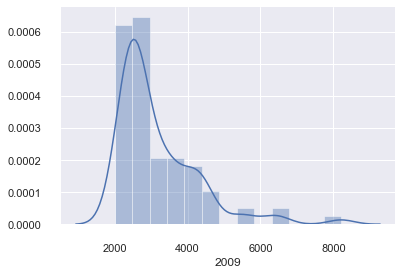

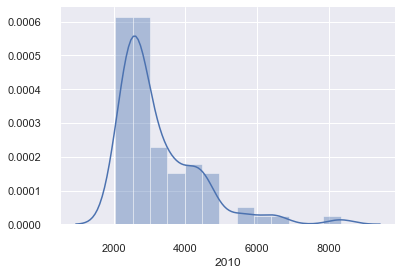

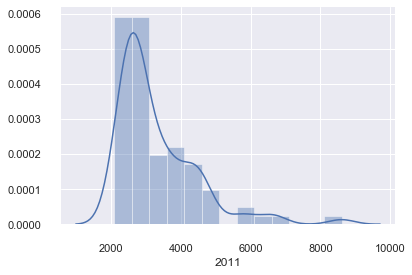

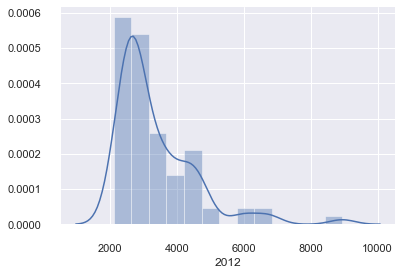

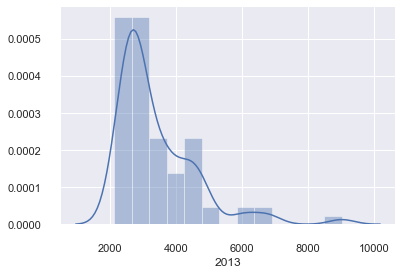

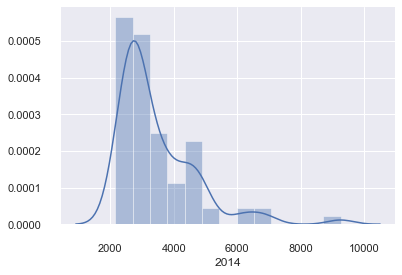

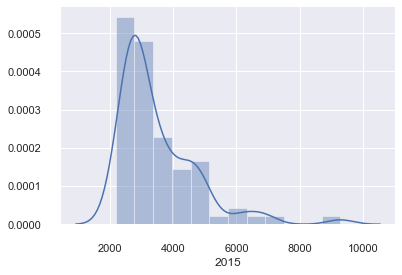

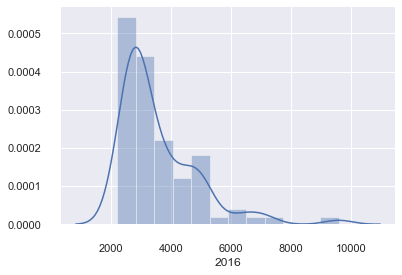

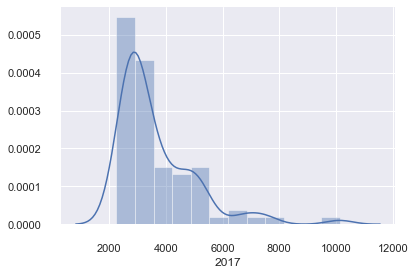

In [47]:
print("The distribution of the wages for each year:")

for col in data.columns[1:]:
    fig, ax = plt.subplots()
    sns.distplot(data[col])
    sns.despine(offset=10, trim=True)

In [118]:
increaseByJob = []
for index, row in data.iterrows():
    increaseByJob.append([row["Beroep"], (row['2017']-row['2009'])])

increaseByJob.sort(key=lambda x:x[1], reverse=True)

print("Jobs with highest wage increase:")
# print(increaseByJob[0:4])
print("\n".join(": ".join(map(str, line)) for line in increaseByJob[0:5]))

Jobs with highest wage increase:
Directeurs van grote ondernemingen: 1910
Managers op het gebied van verkoop, marketing, reclame, public relations en research en development: 1232
Managers in de industrie, de delfstoffenwinning, de bouwnijverheid en de logistiek: 1177
Managers op het gebied van zakelijke dienstverlening en op administratief gebied: 1039
Managers op het gebied van informatie en communicatietechnologie (ICT): 1037


In [41]:
def avgWageIncrease(data):
    for col in data.columns[1:]:
        a = np.maximum(data[col] - data[col].shift(), 0).replace(np.nan, 0)
        count = np.count_nonzero(a)

        if count == 0:
            print(col + ": " + 0)
        else:
            increase = round(np.sum(a) / count,2)
            print(col + ": " + str(increase))

print("Increase in wage for each year:")
avgWageIncrease(data)

Increase in wage for each year:
2009: 302.97
2010: 310.64
2011: 303.82
2012: 291.02
2013: 306.23
2014: 295.73
2015: 299.2
2016: 306.25
2017: 319.13


## Numpy
The Mandelbrot set is the set of complex numbers $c = a+bj$ for which the function $f_{c}(z)=z^{2}+c$ does not diverge when iterated from $z=0$.
The code below implements this naively using three nested for loops. Implement the same functionality in Numpy. Numpy allows you to calculate the result for every point at the same time. How much faster is this parallel implementation ?

1.1060337000008076


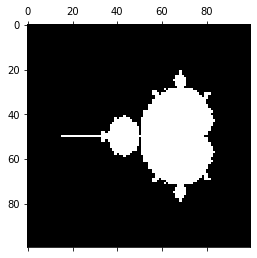

In [142]:
from timeit import default_timer as timer

a_min = -2.5
a_max = 1
b_min = -1.5
b_max = 1.5

start = timer()
frame = []
for y in range(100):
    row = []
    for x in range(100):
        a = a_min + (a_max - a_min)*x/100
        b = b_min + (b_max - b_min)*y/100
        c = a + b*1j
        
        z = 0
        for _ in range(1000):
            z = z*z + c
            
        row.append(abs(z) < 2)
    frame.append(row)
        
end = timer()
print(end - start)

plt.matshow(frame, cmap="gray")

# naively method: O(n^3)
# numpy method (parallel implementation): O(n)